In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
digit_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [3]:
digit_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


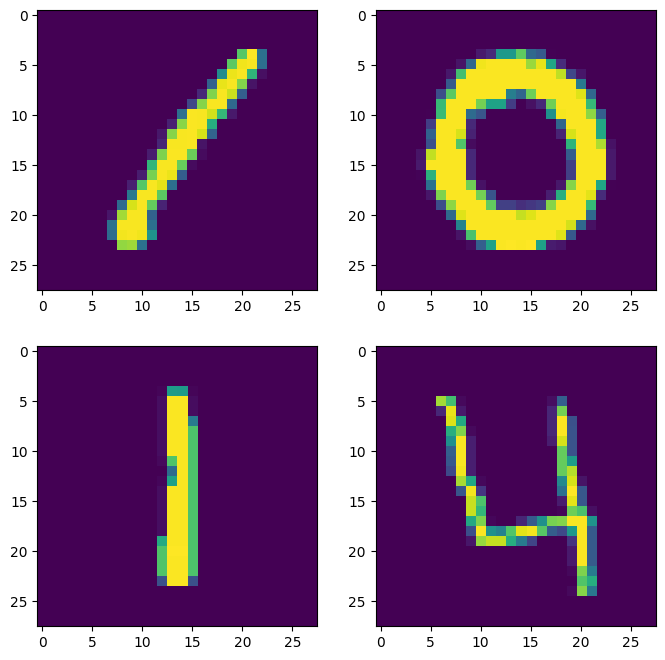

In [4]:
fig = plt.figure(figsize=(8, 8))
for i in range(4):
    fig.add_subplot(2, 2, i + 1)
    plt.imshow(digit_data.iloc[i, 1:].values.reshape(28,28))

In [5]:
X = digit_data.iloc[:, 1:]
y = digit_data.iloc[:, 0]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.8)

In [6]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
y_pred = knn.predict(X_val)

In [8]:
accuracy_score(y_pred, y_val)

0.9429464285714285

In [9]:
knn_final = KNeighborsClassifier()
knn_final.fit(X, y)

KNeighborsClassifier()

In [10]:
test_file_path = "/kaggle/input/digit-recognizer/test.csv"
test_data = pd.read_csv(test_file_path)

preds = knn_final.predict(test_data),

In [11]:
output = pd.DataFrame({'ImageId': np.arange(1, len(preds[0])+1),
                       'Label': preds[0]})
output.head()
output.to_csv('/kaggle/working/submission.csv', index=False)
output.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
